<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Checkpoint-#1" data-toc-modified-id="Checkpoint-#1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Checkpoint #1</a></span></li><li><span><a href="#Checkpoint-#2" data-toc-modified-id="Checkpoint-#2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Checkpoint #2</a></span></li></ul></div>

# Introduction
State notebook purpose here

# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

# Checkpoint #1

1. Find a dataset you'd like to explore. This can be something you're familiar with or something new. Create a Jupyter notebook and then:
    + Choose one variable and plot that variable four different ways.
    + Choose two continuous variables, and plot them three different ways.
    + Choose one continuous variable and one categorical variable, and plot them six different ways.
    + Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

In [3]:
df = pd.read_csv('data/police-pedestrian-stops-and-vehicle-stops/police_pedestrian_stops_and_vehicle_stops.csv')
df = df[:5000]

No null values in df!

In [4]:
df.isnull().values.any()

False

In [5]:
df.head()

MASTER_INCIDENT_NUMBER PRIORITY_DESCRIPTION       PROBLEM  \
0         DPD-12-0528225       P3 Public Need  Vehicle Stop   
1         DPD-12-0147770       P3 Public Need  Subject Stop   
2         DPD-12-0306079       P3 Public Need  Subject Stop   
3         DPD-12-0331882       P3 Public Need  Subject Stop   
4         DPD-15-0647708       P3 Public Need  Subject Stop   

                ADDRESS  CALL_CLASS     TIME_PHONEPICKUP  \
0  8500 W CRESTLINE AVE           2  2012-11-13 00:02:22   
1  8500 W CRESTLINE AVE           2  2012-04-11 00:22:38   
2  8500 W CRESTLINE AVE           2  2012-07-10 00:29:19   
3  8500 W CRESTLINE AVE           2  2012-07-24 04:40:57   
4  8500 W Crestline Ave           2  2015-11-05 00:37:02   

             CALL_DISPOSITION       GEO_X       GEO_Y     GEO_LON    GEO_LAT  \
0  K - Street Check Completed  3114742.65  1650362.34 -105.092691  39.618329   
1                 Arrest Made  3114742.65  1650362.34 -105.092691  39.618329   
2               Party Advised  3114742.65  1650362.34 -105.092691  39.618329   
3               Party Advised  3114742.65  1650362.34 -105.092691  39.618329   
4               Party Advised  3114742.65  1650362.34 -105.092691  39.618329   

  DISTRICT_ID PRECINCT_ID NEIGHBORHOOD_NAME  
0           4         423           Marston  
1           4         423           Marston  
2           4         423           Marston  
3           4         423           Marston  
4           4         423           Marston

In [6]:
neighborhood_count = list(df.NEIGHBORHOOD_NAME.value_counts())[:20]
neighborhood_name = list(df.NEIGHBORHOOD_NAME.value_counts().keys())[:20]

In [7]:
df['ADDRESS'] = df['ADDRESS'].apply(lambda x: x.lower())

In [8]:
df['month'] = df['TIME_PHONEPICKUP'].apply(lambda x: x[5:10])
df['month'] = df['month'].apply(lambda x: float(x.replace('-', '.')))


/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


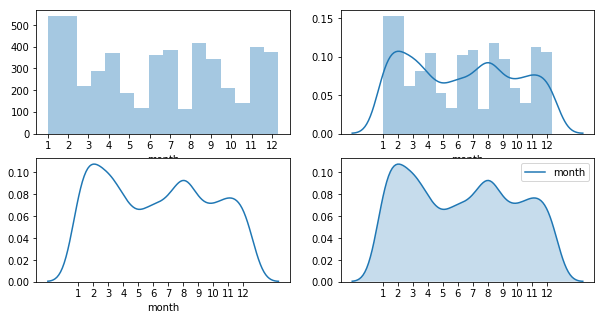

In [9]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
sns.distplot(df['month'], kde= False)
plt.xticks(np.arange(1,13,1))

plt.subplot(2,2,2)
sns.distplot(df['month'], kde= True)
plt.xticks(np.arange(1,13,1))

plt.subplot(2,2,3)
sns.distplot(df['month'], hist=False)
plt.xticks(np.arange(1,13,1))

plt.subplot(2,2,4)
sns.kdeplot(df['month'], shade=True)
plt.xticks(np.arange(1,13,1))

plt.show()

Best plot would be the first one because it gives a great visualization of the months that are most frequent and the estimate count according to the y-axis. The other plots contain the kernel density estimate that is not necessary and doesn't give an accurate representation of each month's count. 

In [10]:
top_address = list(df.ADDRESS.value_counts().keys()[:2])
top_address = df[df['ADDRESS'].isin(top_address)]
top_address['month'] = top_address['month'].apply(lambda x: int(x))

/Users/marshallmamiya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


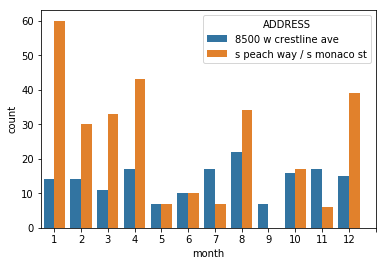

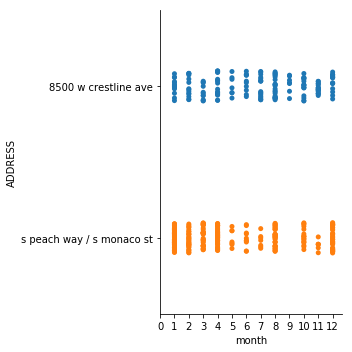

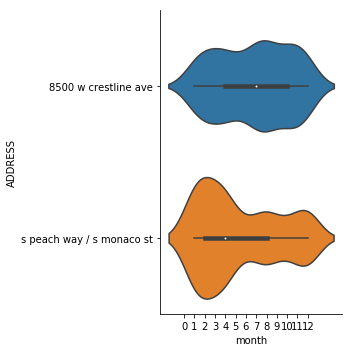

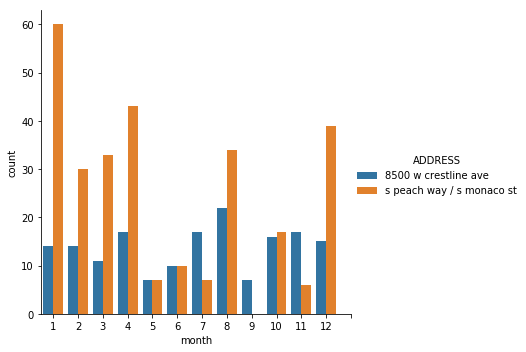

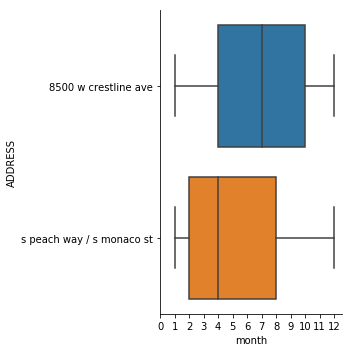

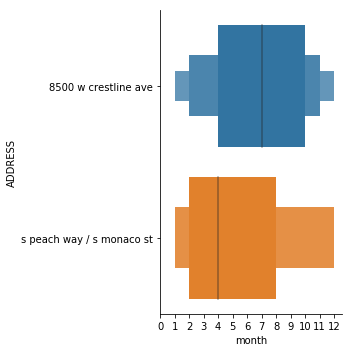

In [11]:
sns.countplot(x ='month', hue ='ADDRESS', data = top_address)
plt.xticks(np.arange(0,13,1))


sns.catplot(x ='month', y ='ADDRESS', data = top_address)
plt.xticks(np.arange(0,13,1))


sns.catplot(x ='month', y ='ADDRESS', data = top_address, kind='violin')
plt.xticks(np.arange(0,13,1))


sns.catplot(x='month', hue ='ADDRESS', data = top_address, kind='count')
plt.xticks(np.arange(0,13,1))


sns.catplot(x='month', y ='ADDRESS', data = top_address, kind='box')
plt.xticks(np.arange(0,13,1))


sns.catplot(x='month', y = 'ADDRESS', data = top_address, kind='boxen')
plt.xticks(np.arange(0,13,1))

plt.show()

The best plots are the countplots. Plots shows a clear comparison between the two categorical features for each month. The other plots give more information regarding the averages and percentiles but don't allow a clear comparison between each categorical feature. If the purpose is to see in general what time of year is the most frequent for traffic stops, then the violin plot would suffice.  The violin plot shows the average month, the peak months and the lower and upper percentiles. The box plots does the same except it doesn't show the peak months. 

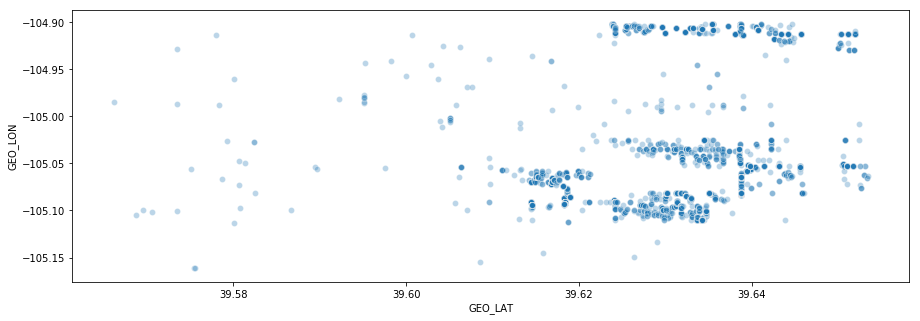

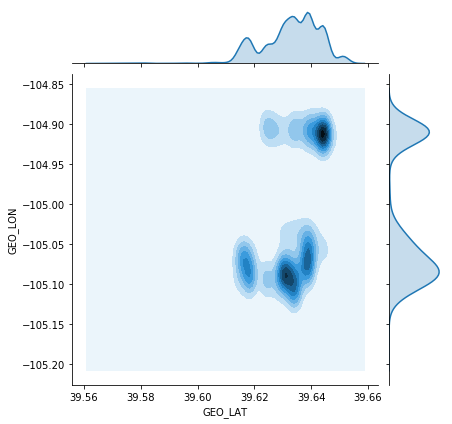

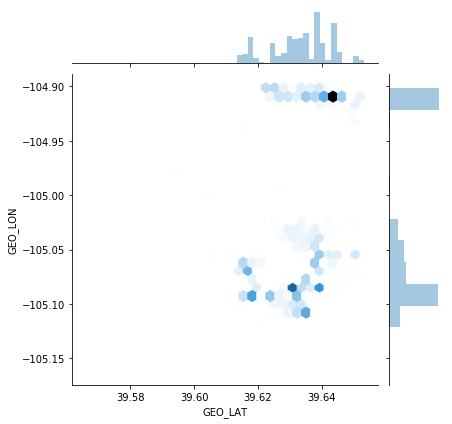

In [12]:
plt.figure(figsize=(15,5))

sns.scatterplot(df['GEO_LAT'][:5000], df['GEO_LON'][:5000], alpha = .3)

sns.jointplot(df['GEO_LAT'][:5000], df['GEO_LON'][:5000], kind = 'kde')

sns.jointplot(df['GEO_LAT'][:5000], df['GEO_LON'][:5000], kind = 'hex')

plt.show()

The clearest plot would be the kernel density estimate or the hex plot. The contrast of color to show the density of the plot is much clearer than seeing a bunch of points overlapping each other like the scatter plot. The hex plot shows a smaller range of specific points that are most frequent unlike the kernel density plot. This allows the viewer to pinpoint these smaller range of coordinates. 

# Checkpoint #2

2. Find a dataset with at least four continuous variables and one categorical variable. Create one master plot that gives insight into the variables and their interrelationships, including:
    + Probability distributions
    + Bivariate relationships
    + Whether the distributions or the relationships vary across groups
    + Accompany your plot with a written description of what you see.

In [13]:
zipfile = ZipFile('data/berlin-airbnb-data.zip')
df2 = pd.read_csv(zipfile.open('listings.csv'))

In [14]:
df2.head()

id                                              name  host_id host_name  \
0  2015  Berlin-Mitte Value! Quiet courtyard/very central     2217       Ian   
1  2695                Prenzlauer Berg close to Mauerpark     2986   Michael   
2  3176                   Fabulous Flat in great Location     3718    Britta   
3  3309                 BerlinSpot Schöneberg near KaDeWe     4108      Jana   
4  7071                  BrightRoom with sunny greenview!    17391    Bright   

      neighbourhood_group             neighbourhood   latitude  longitude  \
0                   Mitte           Brunnenstr. Süd  52.534537  13.402557   
1                  Pankow  Prenzlauer Berg Nordwest  52.548513  13.404553   
2                  Pankow   Prenzlauer Berg Südwest  52.534996  13.417579   
3  Tempelhof - Schöneberg           Schöneberg-Nord  52.498855  13.349065   
4                  Pankow            Helmholtzplatz  52.543157  13.415091   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt     60               4                118  2018-10-28   
1     Private room     17               2                  6  2018-10-01   
2  Entire home/apt     90              62                143  2017-03-20   
3     Private room     26               5                 25  2018-08-16   
4     Private room     42               2                197  2018-11-04   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               3.76                               4               141  
1               1.42                               1                 0  
2               1.25                               1               220  
3               0.39                               1               297  
4               1.75                               1                26

In [19]:
#drop outliers
df2.drop(df2.loc[df2['minimum_nights'] > 100].index, inplace=True)

In [15]:
top_neighborhoods = list(df2.neighbourhood_group.value_counts().keys()[:5])

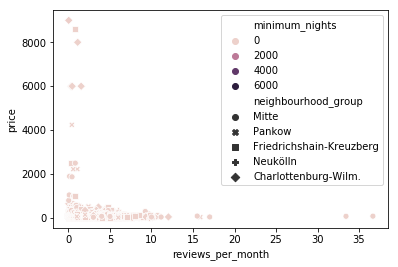

In [17]:
sns.scatterplot(x='reviews_per_month', y='price', hue='minimum_nights', 
                style='neighbourhood_group', data=df2[df2.neighbourhood_group.isin(top_neighborhoods)])

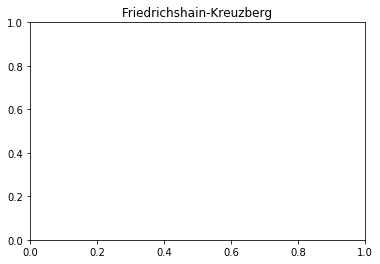

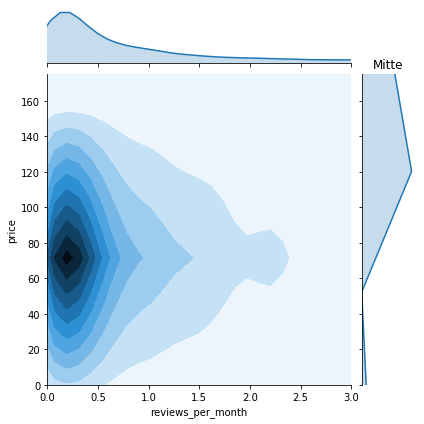

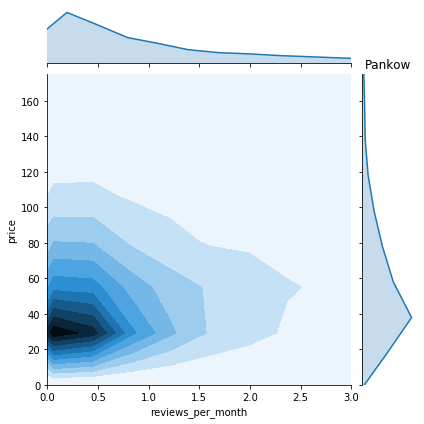

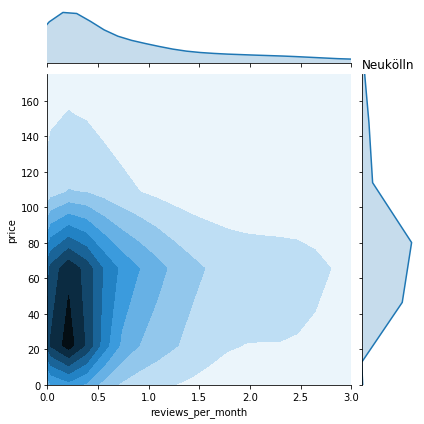

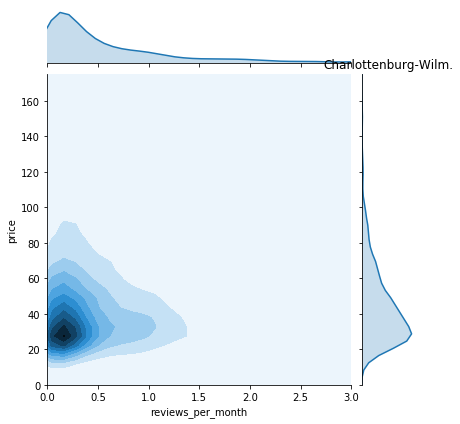

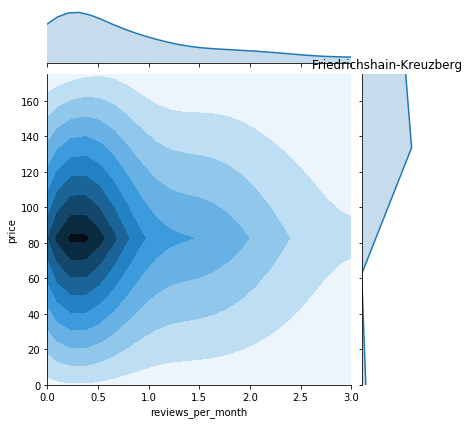

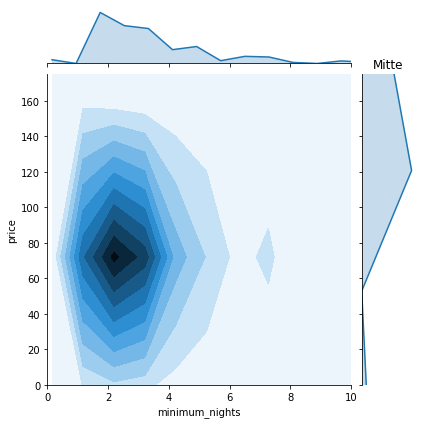

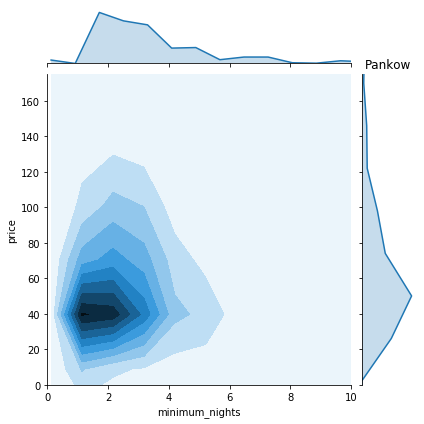

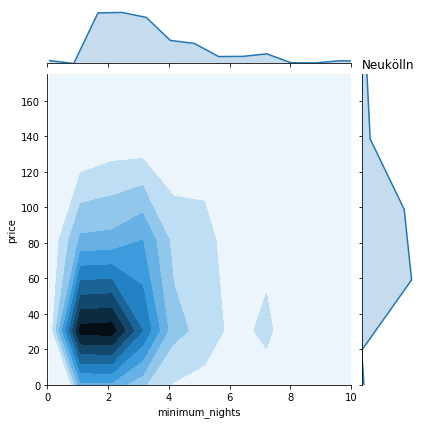

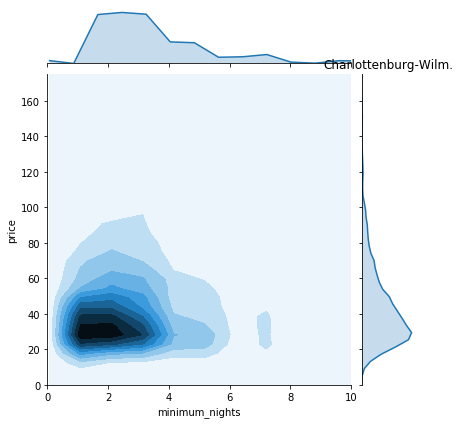

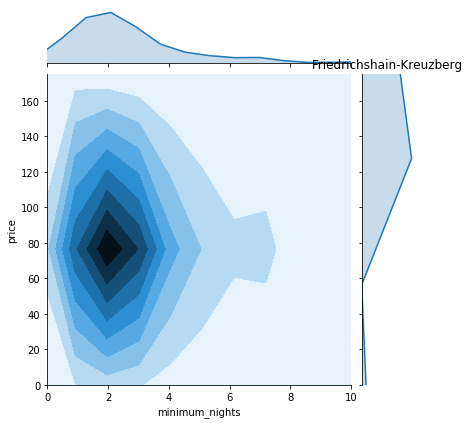

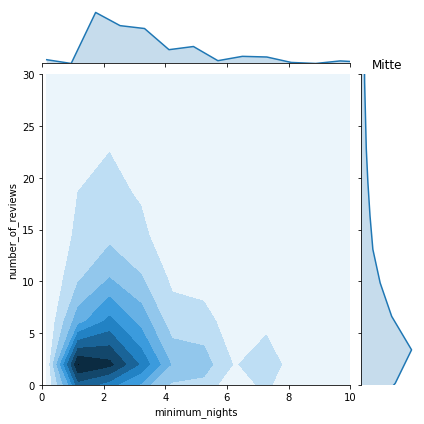

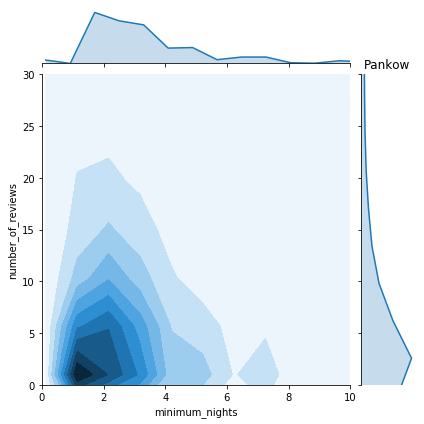

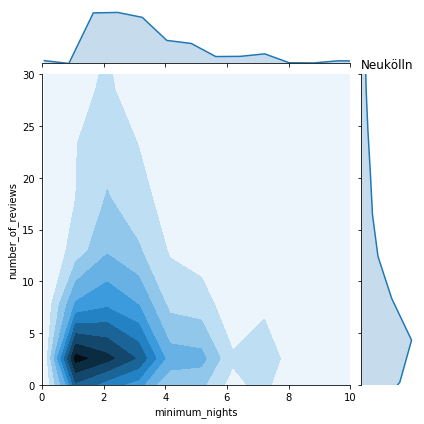

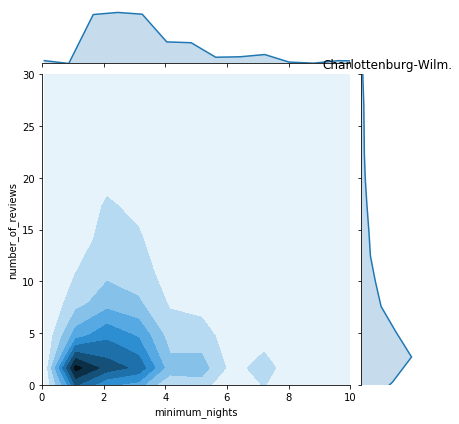

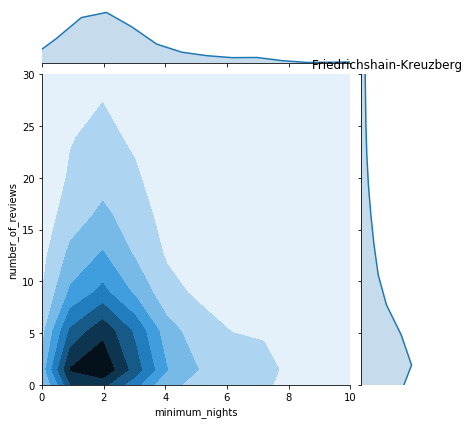

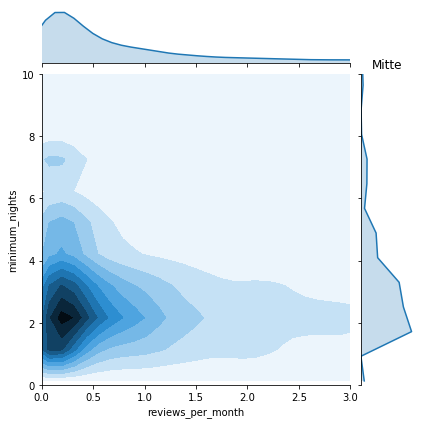

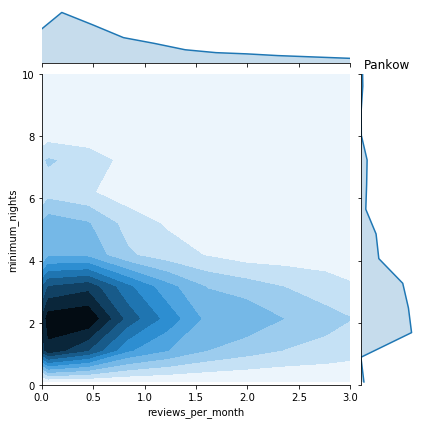

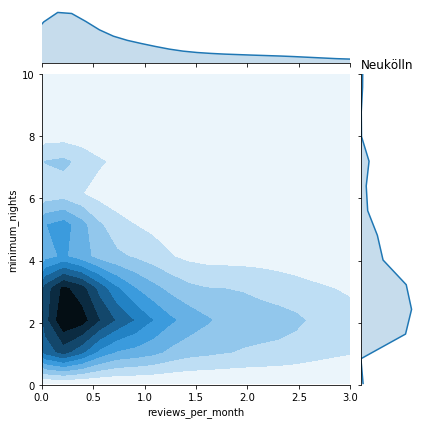

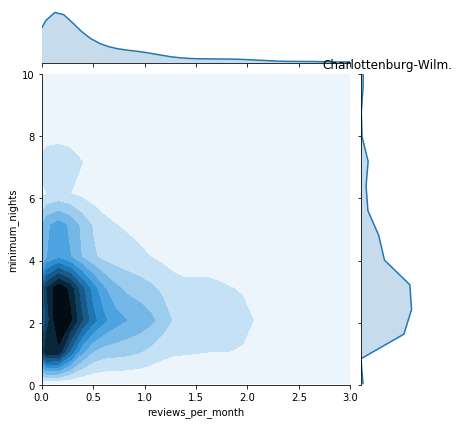

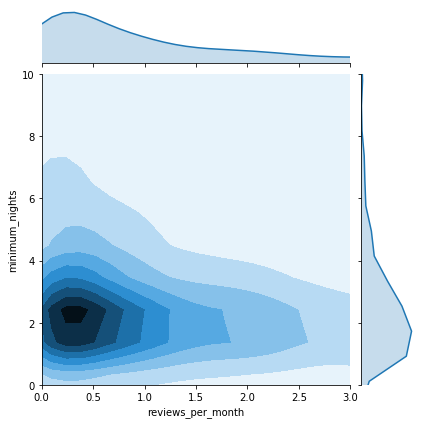

In [37]:
for i in range(len(top_neighborhoods)):
    plt.title(top_neighborhoods[i])
    sns.jointplot(x='reviews_per_month', y='price', data=df2[df2.neighbourhood_group == top_neighborhoods[i]], xlim=(0,3), ylim= (0, 175), kind='kde')
    
for i in range(len(top_neighborhoods)):
    plt.title(top_neighborhoods[i])    
    sns.jointplot(x='minimum_nights', y='price', data=df2[df2.neighbourhood_group == top_neighborhoods[i]], xlim=(0,10), ylim= (0, 175), kind='kde')
    
for i in range(len(top_neighborhoods)):
    plt.title(top_neighborhoods[i])
    sns.jointplot(x='minimum_nights', y='number_of_reviews', data=df2[df2.neighbourhood_group == top_neighborhoods[i]], xlim=(0,10), ylim= (0, 30), kind='kde')

for i in range(len(top_neighborhoods)):
    plt.title(top_neighborhoods[i])
    sns.jointplot(x='reviews_per_month', y='minimum_nights', data=df2[df2.neighbourhood_group == top_neighborhoods[i]], xlim=(0,3), ylim= (0, 10), kind='kde')